In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans , DBSCAN , AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from scipy.cluster.hierarchy import dendrogram, linkage
import streamlit as st




In [25]:
class_data = pd.read_csv("class.csv")
class_data.head(5)

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [26]:
zoo_data = pd.read_csv("zoo.csv")
zoo_data.head(5)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


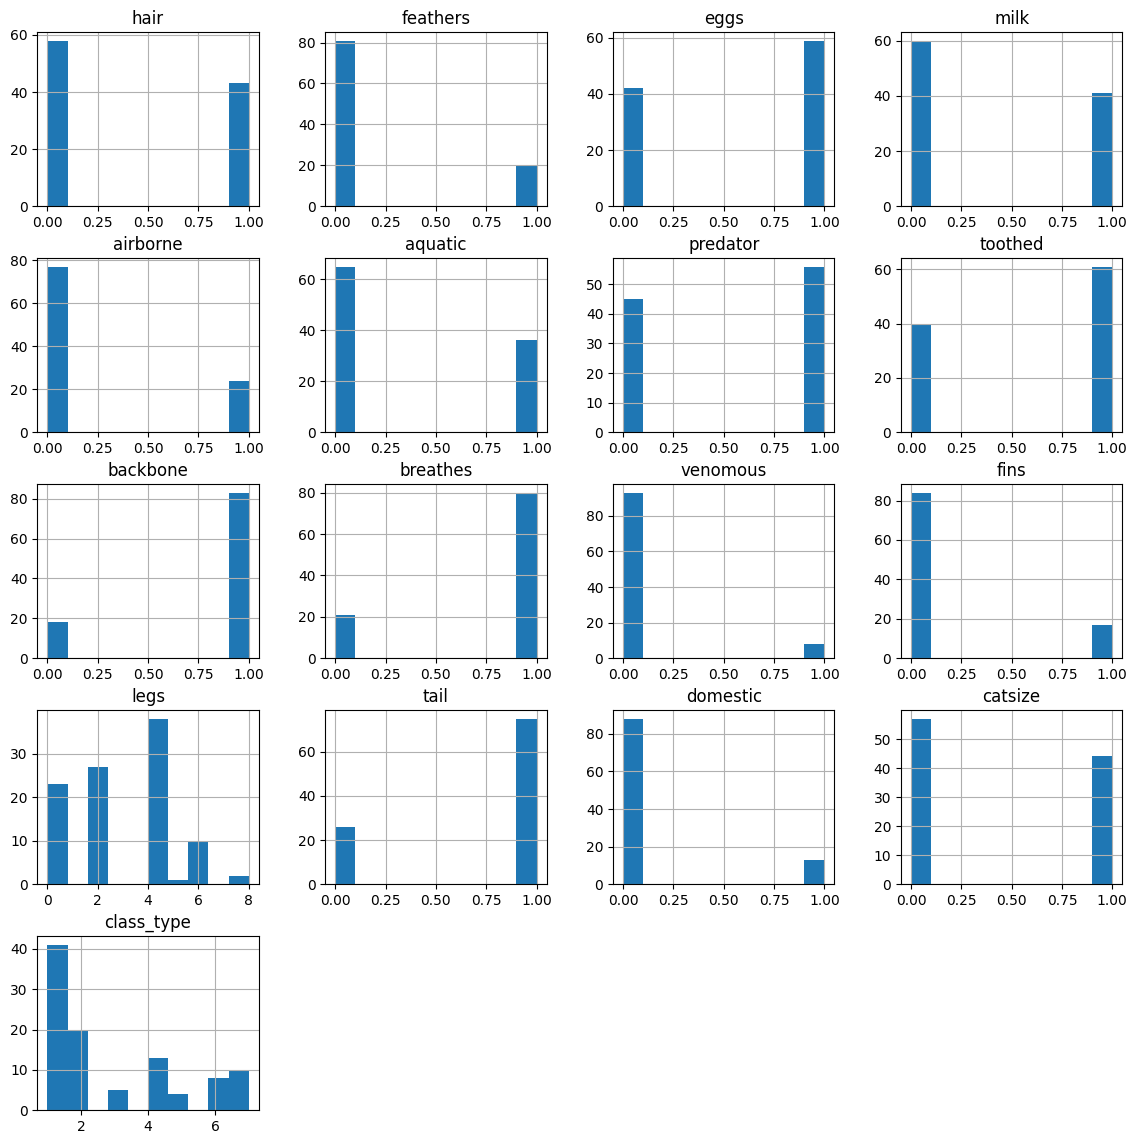

In [27]:
zoo_data.hist(figsize=(14,14), bins= 10);

In [28]:
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [29]:

df = zoo_data.iloc[:, 1:-1]
df.head(1)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1


In [ ]:
true_class = zoo_data["class_type"]



y_true type: <class 'numpy.ndarray'>
y_true shape: (101,)


In [31]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [32]:
#K-Mean Clustering 

# Create and fit K-Means model
""""
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(df_scaled)

df_scaled = pd.DataFrame(df_scaled)

labels = kmeans.fit_predict(df_scaled)

ari = adjusted_rand_score(true_class, labels)
nmi = normalized_mutual_info_score(true_class, labels)
ari,nmi
"""

'"\nkmeans = KMeans(n_clusters=7, random_state=0)\nkmeans.fit(df_scaled)\n\ndf_scaled = pd.DataFrame(df_scaled)\n\nlabels = kmeans.fit_predict(df_scaled)\n\nari = adjusted_rand_score(true_class, labels)\nnmi = normalized_mutual_info_score(true_class, labels)\nari,nmi\n'

In [33]:
#DBSCAN Clustering
"""
db = DBSCAN(eps=3, min_samples=5)
db_labels = db.fit_predict(df_scaled)
db_ari = adjusted_rand_score(true_class, db_labels)
db_nmi = normalized_mutual_info_score(true_class, db_labels)

db_ari , db_nmi

"""

'\ndb = DBSCAN(eps=3, min_samples=5)\ndb_labels = db.fit_predict(df_scaled)\ndb_ari = adjusted_rand_score(true_class, db_labels)\ndb_nmi = normalized_mutual_info_score(true_class, db_labels)\n\ndb_ari , db_nmi\n\n'

In [34]:
#Agglomerative Model 
"""
algo = AgglomerativeClustering(n_clusters=7)
algo_labels = algo.fit_predict(df_scaled)
algo_ari = adjusted_rand_score(true_class,algo_labels)
algo_nmi = normalized_mutual_info_score(true_class, algo_labels)

algo_ari , algo_nmi
"""

'\nalgo = AgglomerativeClustering(n_clusters=7)\nalgo_labels = algo.fit_predict(df_scaled)\nalgo_ari = adjusted_rand_score(true_class,algo_labels)\nalgo_nmi = normalized_mutual_info_score(true_class, algo_labels)\n\nalgo_ari , algo_nmi\n'

In [46]:

import importlib
import methods

importlib.reload(methods)
from methods import choose_clustering ,evaluate_algorithms ,evaluate_algorithms , scatter_plotting , algo_characteristics ,animals_list_forAlgorithm

In [36]:
Kmean_Algorithm = choose_clustering("kmeans" , df_scaled , true_class)
Kmean_Algorithm

(array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 5, 5, 5, 2, 0, 1, 1, 2, 2,
        0, 2, 3, 6, 4, 0, 0, 0, 3, 0, 0, 2, 1, 0, 0, 2, 1, 3, 3, 2, 3, 2,
        0, 0, 5, 0, 0, 0, 0, 3, 6, 5, 0, 0, 2, 2, 2, 2, 1, 1, 4, 0, 0, 0,
        1, 0, 0, 0, 0, 2, 3, 1, 0, 0, 4, 5, 2, 2, 6, 5, 1, 2, 0, 5, 1, 2,
        3, 6, 6, 6, 1, 0, 0, 2, 0, 3, 0, 5, 2], dtype=int32),
 0.920703117952734,
 np.float64(0.905031363463271))

In [37]:
dbscan_Algorithm = choose_clustering("dbscan" , df_scaled , true_class)
dbscan_Algorithm

(array([ 0,  0,  1,  0,  0,  0,  0,  1,  1,  0,  0,  2,  1,  3,  3,  3,  2,
         0,  1,  0,  2,  2,  0,  2,  4, -1, -1,  0,  0,  0,  4,  0,  0,  2,
         1,  0,  0,  2,  1, -1,  4,  2,  4,  2,  0,  0,  3,  0,  0,  0,  0,
         4, -1,  3,  0,  0,  2,  2,  2,  2,  1,  1, -1,  0,  0,  0,  0,  0,
         0,  0,  0,  2, -1,  1,  0,  0, -1, -1,  2,  2, -1,  4,  1,  2,  0,
         3, -1,  2,  4, -1,  2, -1,  1,  0,  0,  2,  0, -1,  0,  4,  2]),
 0.9167902635502546,
 np.float64(0.8530066219529121))

In [38]:
agglomerative_Algorithm = choose_clustering("agglomerative" , df_scaled , true_class)
agglomerative_Algorithm

(array([2, 2, 4, 2, 2, 2, 5, 4, 4, 5, 2, 3, 4, 0, 0, 0, 3, 2, 4, 6, 3, 3,
        2, 3, 0, 1, 1, 2, 2, 5, 0, 5, 2, 3, 4, 5, 2, 3, 4, 0, 0, 3, 0, 3,
        2, 2, 0, 2, 2, 2, 2, 0, 1, 0, 2, 2, 3, 3, 3, 3, 4, 4, 1, 2, 2, 5,
        6, 2, 5, 2, 5, 3, 0, 4, 6, 6, 1, 1, 3, 3, 1, 0, 4, 3, 2, 0, 1, 3,
        0, 1, 3, 1, 4, 2, 2, 3, 2, 0, 2, 0, 3]),
 0.6799272723967796,
 np.float64(0.8009444628672762))

In [47]:
evaluate_algorithms(df_scaled, true_class)

{'kmeans': {'ARI': 0.920703117952734, 'NMI': np.float64(0.905031363463271)}}

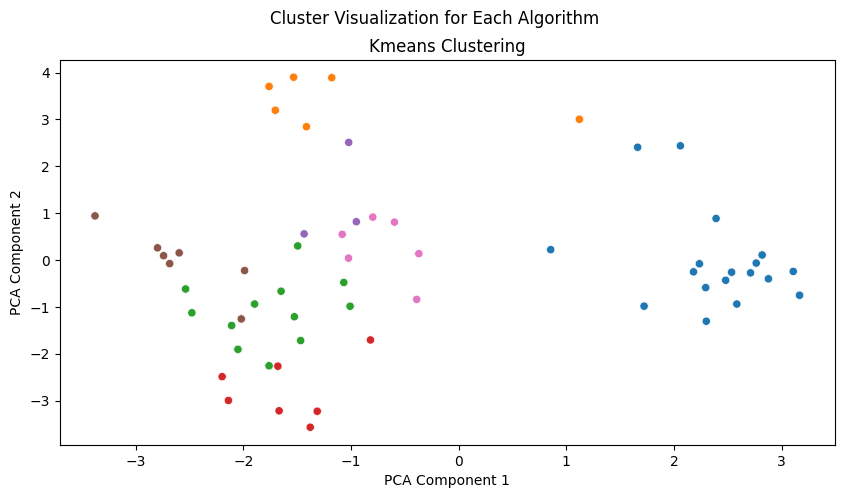

In [43]:
scatter_plotting("kmeans" ,df_scaled , true_class)



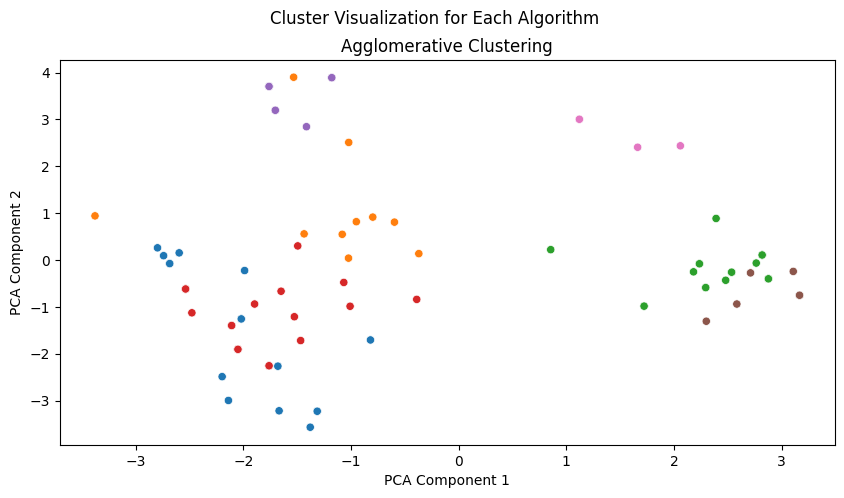

In [40]:
scatter_plotting("agglomerative" ,df_scaled , true_class)


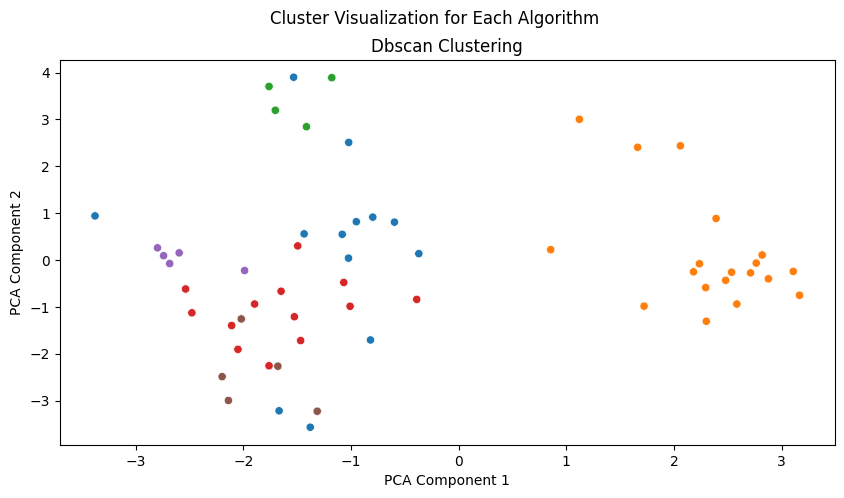

In [41]:
scatter_plotting("dbscan" ,df_scaled , true_class)


In [18]:
kmean_characteristics = algo_characteristics(df, Kmean_Algorithm)
kmean_characteristics

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
Cluster,,,,,,,,,,,,,,,,
0,1.000000,0.0,0.025641,1.000000,0.051282,0.102564,0.512821,0.974359,1.0,1.000000,0.000000,0.051282,3.538462,0.846154,0.205128,0.769231
1,0.000000,0.0,0.866667,0.133333,0.000000,1.000000,0.733333,1.000000,1.0,0.133333,0.066667,1.000000,0.000000,1.000000,0.066667,0.400000
2,0.000000,1.0,1.000000,0.000000,0.800000,0.300000,0.450000,0.000000,1.0,1.000000,0.000000,0.000000,2.000000,1.000000,0.150000,0.300000
3,0.444444,0.0,0.888889,0.000000,0.666667,0.000000,0.222222,0.000000,0.0,1.000000,0.333333,0.000000,6.222222,0.111111,0.111111,0.000000
4,0.000000,0.0,0.666667,0.000000,0.000000,0.666667,1.000000,1.000000,1.0,0.666667,1.000000,0.000000,1.333333,0.666667,0.000000,0.000000
5,0.000000,0.0,1.000000,0.000000,0.000000,0.666667,0.777778,0.000000,0.0,0.222222,0.111111,0.000000,3.222222,0.000000,0.000000,0.111111
6,0.000000,0.0,1.000000,0.000000,0.000000,0.500000,0.666667,0.833333,1.0,1.000000,0.000000,0.000000,3.333333,0.666667,0.000000,0.166667


In [19]:
dbscan_characteristics = algo_characteristics(df , dbscan_Algorithm)
dbscan_characteristics

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
Cluster,,,,,,,,,,,,,,,,
-1,0.153846,0.000000,0.846154,0.0,0.153846,0.538462,0.769231,0.692308,0.692308,0.769231,0.615385,0.076923,3.076923,0.538462,0.076923,0.076923
0,0.951220,0.000000,0.024390,1.0,0.048780,0.146341,0.536585,0.975610,1.000000,1.000000,0.000000,0.097561,3.365854,0.853659,0.195122,0.780488
1,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.666667,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.083333,0.250000
2,0.000000,0.952381,1.000000,0.0,0.761905,0.285714,0.428571,0.000000,1.000000,1.000000,0.000000,0.000000,2.095238,1.000000,0.142857,0.333333
3,0.000000,0.000000,1.000000,0.0,0.000000,0.833333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.833333,0.000000,0.000000,0.166667
4,0.250000,0.000000,1.000000,0.0,0.500000,0.000000,0.125000,0.000000,0.000000,1.000000,0.000000,0.000000,4.500000,0.000000,0.000000,0.000000


In [20]:
agglomerative_characteristics = algo_characteristics(df , agglomerative_Algorithm)
agglomerative_characteristics

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
Cluster,,,,,,,,,,,,,,,,
0,0.235294,0.000000,0.941176,0.0,0.352941,0.294118,0.470588,0.000000,0.0,0.647059,0.176471,0.0,5.000000,0.058824,0.058824,0.058824
1,0.000000,0.000000,0.900000,0.0,0.000000,0.700000,0.900000,0.900000,0.9,0.700000,0.500000,0.1,2.000000,0.600000,0.000000,0.100000
2,1.000000,0.000000,0.034483,1.0,0.068966,0.068966,0.551724,0.965517,1.0,1.000000,0.000000,0.0,3.655172,0.896552,0.000000,0.758621
3,0.000000,0.952381,1.000000,0.0,0.761905,0.285714,0.428571,0.000000,1.0,1.000000,0.000000,0.0,2.095238,1.000000,0.142857,0.333333
4,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.666667,1.000000,1.0,0.000000,0.000000,1.0,0.000000,1.000000,0.083333,0.250000
5,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.250000,1.000000,1.0,1.000000,0.000000,0.0,3.750000,0.750000,1.000000,0.750000
6,0.500000,0.000000,0.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.000000,1.0,0.500000,0.750000,0.000000,1.000000


In [21]:
animals_list_forAlgorithm(Kmean_Algorithm ,zoo_data)


Cluster 0:
aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, puma, pussycat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby, wolf
Cluster 1:
bass, carp, catfish, chub, dogfish, dolphin, haddock, herring, pike, piranha, porpoise, seahorse, sole, stingray, tuna
Cluster 2:
chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren
Cluster 3:
flea, gnat, honeybee, housefly, ladybird, moth, scorpion, termite, wasp
Cluster 4:
frog, pitviper, seasnake
Cluster 5:
clam, crab, crayfish, lobster, octopus, seawasp, slug, starfish, worm
Cluster 6:
frog, newt, slowworm, toad, tortoise, tuatara


In [22]:
animals_list_forAlgorithm(agglomerative_Algorithm ,zoo_data)


Cluster 0:
clam, crab, crayfish, flea, gnat, honeybee, housefly, ladybird, lobster, moth, octopus, scorpion, slug, starfish, termite, wasp, worm
Cluster 1:
frog, frog, newt, pitviper, seasnake, seawasp, slowworm, stingray, toad, tuatara
Cluster 2:
aardvark, antelope, bear, boar, buffalo, cheetah, deer, elephant, fruitbat, giraffe, gorilla, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, puma, raccoon, squirrel, vampire, vole, wallaby, wolf
Cluster 3:
chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, tortoise, vulture, wren
Cluster 4:
bass, carp, catfish, chub, dogfish, haddock, herring, pike, piranha, seahorse, sole, tuna
Cluster 5:
calf, cavy, girl, goat, hamster, pony, pussycat, reindeer
Cluster 6:
dolphin, porpoise, seal, sealion


In [23]:
animals_list_forAlgorithm(dbscan_Algorithm ,zoo_data)


Cluster -1:
frog, frog, honeybee, newt, pitviper, scorpion, seasnake, seawasp, slowworm, stingray, toad, tuatara, wasp
Cluster 0:
aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, dolphin, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, porpoise, puma, pussycat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby, wolf
Cluster 1:
bass, carp, catfish, chub, dogfish, haddock, herring, pike, piranha, seahorse, sole, tuna
Cluster 2:
chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, tortoise, vulture, wren
Cluster 3:
clam, crab, crayfish, lobster, octopus, starfish
Cluster 4:
flea, gnat, housefly, ladybird, moth, slug, termite, worm
